# Lecture 3: ML Fundamentals Class Demo

## Imports

In [19]:
# import the libraries
import os
import sys
sys.path.append(os.path.join(os.path.abspath(".."), (".."), "code"))
from plotting_functions import *
from utils import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

DATA_DIR = os.path.join(os.path.abspath(".."), (".."), "data/")
pd.set_option("display.max_colwidth", 200)

<br><br>

## 

Let's bring back King County housing sale prediction data from the course introduction video. You can download the data from [here](https://www.kaggle.com/harlfoxem/housesalesprediction). 

In [20]:
housing_df = pd.read_csv(DATA_DIR + 'kc_house_data.csv')
housing_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Exploratory Data Analysis

Is this a classification problem or a regression problem? 

In [21]:
# How many data points do we have? 

In [22]:
# What are the columns in the dataset? 


Let's explore some features. Let's try the `describe()` method

In [23]:
housing_df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


Do we need to keep all the columns? 

In [24]:
housing_df['id'].unique().shape[0]

21436

In [25]:
housing_df['zipcode'].value_counts()

zipcode
98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: count, Length: 70, dtype: int64

In [26]:
dates = pd.to_datetime(['20141013T000000', '20141209T000000', '20150218T000000'], format='%Y%m%dT%H%M%S')

In [27]:
# What are the value counts of the `waterfront` feature? 
housing_df['waterfront'].value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

In [28]:
# What are the value_counts of `yr_renovated` feature? 
housing_df['yr_renovated'].value_counts()

yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

Many opportunities to clean the data but we'll stop here. 

Let's create `X` and `y`. 

In [34]:
X = housing_df.drop(columns = ['id', 'date', 'zipcode', 'price'])

In [30]:
y = housing_df['price']

<br><br>

## Baseline model 

In [31]:
# Train a DummyRegressor model 

from sklearn.dummy import DummyRegressor # Import DummyRegressor 

# Create a class object for the sklearn model.
dummy_regr = DummyRegressor()


# fit the dummy regressor
dummy_regr.fit(X,y)

# score the model 
dummy_regr.score(X,y)


0.0

How to interpret the score here? 

In [32]:
# predict on X using the model
dummy_regr.predict(X)

array([540088.14176653, 540088.14176653, 540088.14176653, ...,
       540088.14176653, 540088.14176653, 540088.14176653])

<br><br>

## Decision tree model 

In [35]:
# Train a decision tree model 

from sklearn.tree import DecisionTreeRegressor # Import DecisionTreeRegressor 

# Create a class object for the sklearn model.
dt_regr = DecisionTreeRegressor(random_state = 123)


# fit the decision tree regressor 
dt_regr.fit(X,y)

# score the model 
dt_regr.score(X,y)

0.9991338290544213

We are getting a perfect accuracy. Should we be happy with this model and deploy it? Why or why not?

What's the depth of this model? 

In [36]:
dt_regr.get_depth()

38

<br><br>

## Data splitting 

Let's split the data and  
- Train on the train split 
- Score on the test split

In [46]:
# Split the data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [47]:
# Instantiate a class object 
dt = DecisionTreeRegressor(random_state=123)

# Train a decision tree on X_train, y_train
dt.fit(X_train, y_train)

# Score on the train set
dt.score(X_train, y_train)


0.9994394006711425

In [48]:
# Score on the test set
dt.score(X_test, y_test)


0.719915905190645

### Activity: Discuss the following questions in your group

- Why is there a large gap between train and test scores? 
- What would be the effect of increasing or decreasing `test_size`?
- Why are we setting the `random_state`? Is it a good idea to try a bunch of values for the `random_state` and pick the one which gives the best scores? 
- Would it be possible to further improve the scores? 

<br><br>

## Hyperparameter optimization 

Let's try out different tree depths. 

In [49]:
# max_depth= 1 
dt = DecisionTreeRegressor(max_depth=1, random_state=123) 
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1, random_state=123)

[Text(0.5, 0.75, 'grade <= 8.5\nsamples = 17290\nvalue = 539306.468'),
 Text(0.25, 0.25, 'samples = 13926\nvalue = 437700.717'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'samples = 3364\nvalue = 959925.28'),
 Text(0.625, 0.5, '  False')]

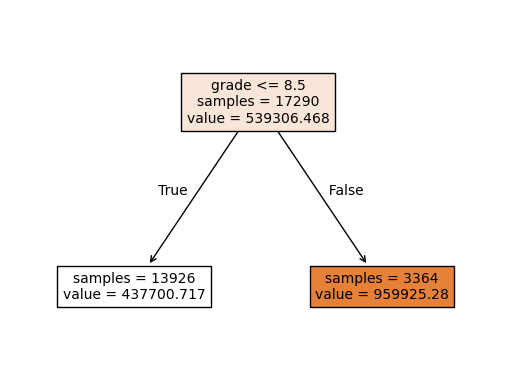

In [50]:
# Visualize your decision stump
from sklearn.tree import plot_tree 
plot_tree(dt, feature_names = X.columns.tolist(), impurity=False, filled=True, fontsize=10)

In [51]:
dt.score(X_train, y_train) # Score on the train set

0.3209427041566191

In [52]:
dt.score(X_test, y_test) # Score on the test set

0.31767136668453344

- How do these scores compare to the previous scores? 

Let's try depth 10. 

In [53]:
dt = DecisionTreeRegressor(max_depth=10, random_state=123) # max_depth= 10 
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=123)

In [54]:
dt.score(X_train, y_train) # Score on the train set

0.9108334653214172

In [55]:
dt.score(X_test, y_test) # Score on the test set

0.7728396574320712

Any improvements? Which depth should we pick? 

<br><br>

## Single validation set

We are using the test data again and again. How about creating a validation set to pick the right depth and assessing the final model on the test set?   

In [58]:
# Create a validation set 
X_tr, X_valid, y_tr, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

In [59]:
tr_scores = []
valid_scores = []
depths = np.arange(1, 35, 2)

for depth in depths:  
    # Create and fit a decision tree model for the given depth  
    dt = DecisionTreeRegressor(max_depth=depth, random_state=123)
    
    dt.fit(X_tr, y_tr)
    # Calculate and append r2 scores on the training and validation sets
    tr_scores.append(dt.score(X_tr, y_tr))
    valid_scores.append(dt.score(X_valid, y_valid))
    
results_single_valid_df = pd.DataFrame({"train_score": tr_scores, 
                           "valid_score": valid_scores},index = depths)
results_single_valid_df

,train_score,valid_score
1,0.319559,0.326616
3,0.603739,0.555180
5,0.754938,0.677567
7,0.833913,0.737285
9,0.890456,0.763480
11,0.931896,0.790521
13,0.963024,0.769030
15,0.981643,0.752728
17,0.991810,0.735637
19,0.996424,0.745925


<Axes: ylabel='r2 scores'>

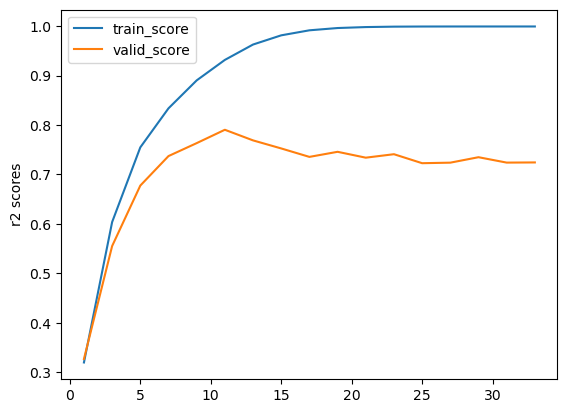

In [60]:
results_single_valid_df[['train_score', 'valid_score']].plot(ylabel='r2 scores')

What depth gives the "best" validation score? 

In [61]:
# What depth gives the "best" validation score?
best_depth = results_single_valid_df['valid_score'].idxmax() 
best_depth

11

## Cross-validation

In [66]:
depths = np.arange(1, 35, 2)

cv_train_scores = []
cv_valid_scores = []
for depth in depths: 
    # Create and fit a decision tree model for the given depth   
    dt = DecisionTreeRegressor(max_depth = depth, random_state=123)

    # Carry out cross-validation
    results = cross_validate(dt, X_train, y_train, cv=5, return_train_score=True)
    cv_train_scores.append(results['train_score'].mean())
    cv_valid_scores.append(results['test_score'].mean())

In [67]:
results_df = pd.DataFrame({"train_score": cv_train_scores, 
                           "valid_score": cv_valid_scores
                           },
                           index=depths
                            )
results_df

,train_score,valid_score
1,0.321050,0.322465
3,0.603243,0.559284
5,0.752169,0.688484
7,0.835876,0.758259
9,0.894960,0.768184
11,0.938201,0.772185
13,0.966812,0.760966
15,0.983340,0.754620
17,0.992220,0.730025
19,0.996487,0.722803


<Axes: title={'center': 'Housing price prediction depth vs. r2 score'}, ylabel='r2 score'>

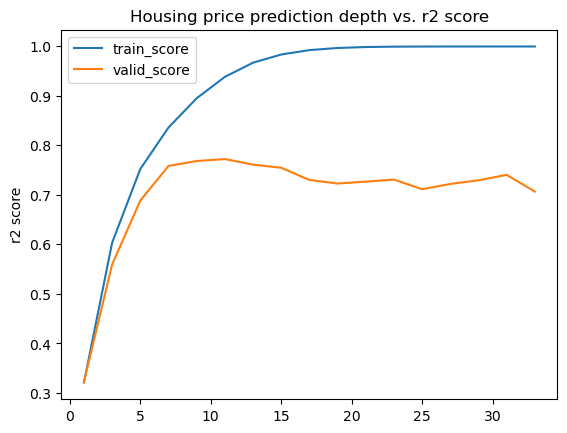

In [68]:
results_df[['train_score', 'valid_score']].plot(ylabel='r2 score', title='Housing price prediction depth vs. r2 score')

What's the "best" depth with cross-validation? 

In [69]:
best_depth = results_df['valid_score'].idxmax()
best_depth

11

### Discuss the following questions in your group

1.	At which depth(s) are we underfitting? At which depth(s) are we overfitting?
2.	Above, we chose the depth that gives us the best cross-validation score. Is it always a good idea to select this depth? What if a simpler model with a smaller max_depth gives nearly the same cross-validation score?
3.	If our main concern is test scores, why don't we use the test set during training?
4.	Do you trust our hyperparameter optimization process? In other words, do you believe we've found the best possible depth?

<br><br>

## Assessing on the test set

In [70]:
# Train a model with the best depth of the full training data
dt_final = DecisionTreeRegressor(max_depth=best_depth, random_state=123)
dt_final.fit(X_train, y_train)
dt_final.score(X_train, y_train)

0.9308647034083802

In [71]:
dt_final.score(X_test, y_test)

0.7784948928666875

How do these scores compare to the scores when we used a single validation set? 

### Learned model 

In [72]:
#What's the depth of the model? 
dt_final.get_depth()

11

In [ ]:
# plot_tree(dt_final, feature_names = X_train.columns.tolist(), impurity=False, filled=True);

In [73]:
# Which features are the most important ones?
dt_final.feature_importances_

array([0.00080741, 0.00327551, 0.25123925, 0.01808825, 0.00079645,
       0.03213916, 0.01190633, 0.00106308, 0.36400802, 0.02313684,
       0.00295235, 0.01209545, 0.00064647, 0.17216105, 0.06835056,
       0.02416048, 0.01317334])

Let's examine feature importances. 

In [74]:
df = pd.DataFrame( 
    data = {
        "features": dt_final.feature_names_in_,
        "feature_importances": dt_final.feature_importances_
    }
)
df.sort_values("feature_importances", ascending=False)

,features,feature_importances
8,grade,0.364008
2,sqft_living,0.251239
13,lat,0.172161
14,long,0.068351
5,waterfront,0.032139
15,sqft_living15,0.024160
9,sqft_above,0.023137
3,sqft_lot,0.018088
16,sqft_lot15,0.013173
11,yr_built,0.012095


<br><br>

## Concepts we revised in this demo

- Exploratory data analysis
- Baselines
- Data splitting: train, test, validation sets
- Cross validation
- Underfitting, overfitting, the fundamental tradeoff
- The golden rule of supervised ML

## Typical steps to build a supervised machine learning model

- Ensure the data is appropriate for your task (e.g., labeled data, suitable features).
- Split the data into training and testing sets.
- Perform exploratory data analysis (EDA) on the training data to understand distributions, identify patterns, and detect potential issues.
- Preprocess and encode features (e.g., handle missing values, scale features, encode categorical variables).
    - coming up 
- Build a baseline model to establish a performance benchmark.
- Train multiple candidate models on the training data.
    - coming up  
- Select promising models and perform hyperparameter tuning using cross-validation.
    - coming up 
- Evaluate the generalization performance of the best model on the test set.


<br><br>